In [4]:
#importing standard libraries 
##  基础函数库
import numpy as np 
import pandas as pd

## 绘图函数库
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb 

In [3]:
#下载需要用到的数据集
!wget https://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/8LightGBM/high_diamond_ranked_10min.csv

--2022-03-30 21:04:27--  https://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/8LightGBM/high_diamond_ranked_10min.csv
正在解析主机 tianchi-media.oss-cn-beijing.aliyuncs.com (tianchi-media.oss-cn-beijing.aliyuncs.com)... 111.13.210.20
正在连接 tianchi-media.oss-cn-beijing.aliyuncs.com (tianchi-media.oss-cn-beijing.aliyuncs.com)|111.13.210.20|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度：1446502 (1.4M) [text/csv]
正在保存至: “high_diamond_ranked_10min.csv”

high_diamond_ranked 100%[===================>]   1.38M  3.35MB/s  用时 0.4s      

2022-03-30 21:04:29 (3.35 MB/s) - 已保存 “high_diamond_ranked_10min.csv” [1446502/1446502])



In [5]:
df = pd.read_csv('./high_diamond_ranked_10min.csv')
y = df.blueWins

In [7]:
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [6]:
## 利用.info()查看数据的整体信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [8]:
## 标注标签并利用value_counts函数查看训练集标签的数量
y = df.blueWins
y.value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

In [9]:
## 标注特征列
drop_cols = ['gameId','blueWins']
x = df.drop(drop_cols, axis=1)

In [12]:
## 对于特征进行一些统计描述
x.describe()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [13]:
## 根据上面的描述，我们可以去除一些重复变量，比如只要知道蓝队是否拿到一血，我们就知道红队有没有拿到，可以去除红队的相关冗余数据。
drop_cols = ['redFirstBlood','redKills','redDeaths'
             ,'redGoldDiff','redExperienceDiff', 'blueCSPerMin',
            'blueGoldPerMin','redCSPerMin','redGoldPerMin']
x.drop(drop_cols, axis=1, inplace=True)

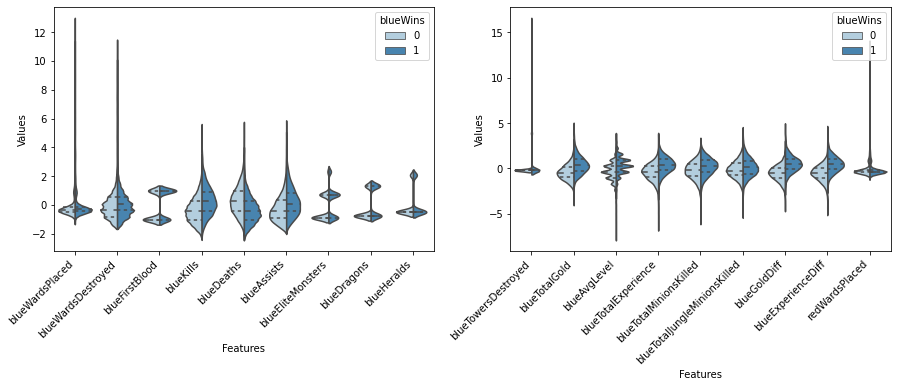

In [14]:
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 0:9]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

fig, ax = plt.subplots(1,2,figsize=(15,5))

# 绘制小提琴图
sns.violinplot(x='Features', y='Values', hue='blueWins', data=data, split=True,
               inner='quart', ax=ax[0], palette='Blues')
fig.autofmt_xdate(rotation=45)

data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 9:18]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

# 绘制小提琴图
sns.violinplot(x='Features', y='Values', hue='blueWins', 
               data=data, split=True, inner='quart', ax=ax[1], palette='Blues')
fig.autofmt_xdate(rotation=45)

plt.show()

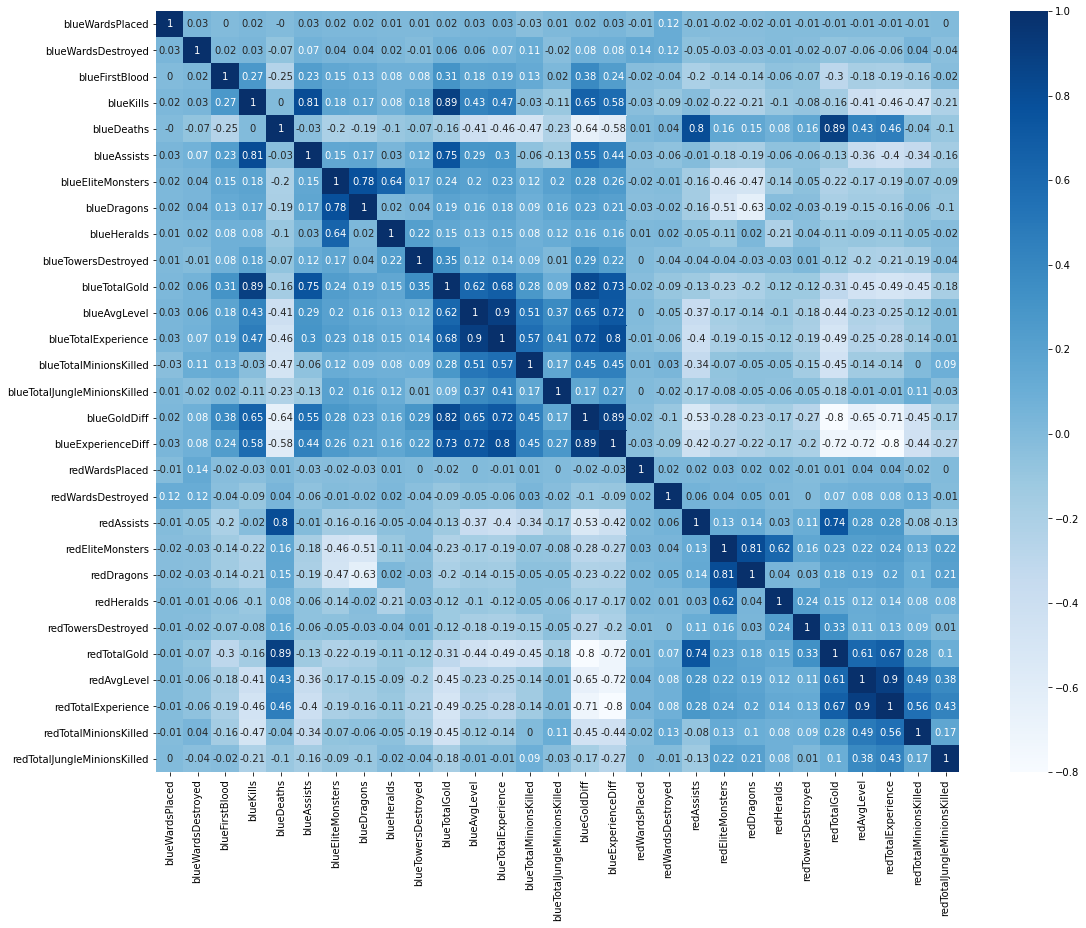

In [15]:
plt.figure(figsize=(18,14))
sns.heatmap(round(x.corr(),2), cmap='Blues', annot=True)
plt.show()

In [16]:
# 去除冗余特征
drop_cols = ['redAvgLevel','blueAvgLevel']
x.drop(drop_cols, axis=1, inplace=True)

/Users/liruizhi/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/liruizhi/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/liruizhi/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/liruizhi/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


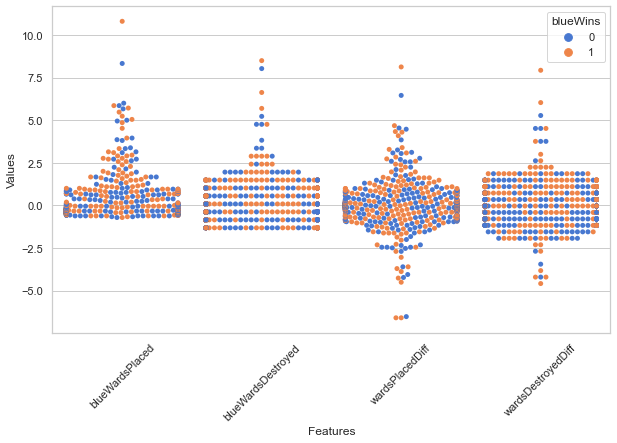

In [17]:
sns.set(style='whitegrid', palette='muted')

# 构造两个新特征
x['wardsPlacedDiff'] = x['blueWardsPlaced'] - x['redWardsPlaced']
x['wardsDestroyedDiff'] = x['blueWardsDestroyed'] - x['redWardsDestroyed']

data = x[['blueWardsPlaced','blueWardsDestroyed','wardsPlacedDiff','wardsDestroyedDiff']].sample(1000)
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

plt.figure(figsize=(10,6))
sns.swarmplot(x='Features', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()

In [18]:
## 去除和眼位相关的特征
drop_cols = ['blueWardsPlaced','blueWardsDestroyed','wardsPlacedDiff',
            'wardsDestroyedDiff','redWardsPlaced','redWardsDestroyed']
x.drop(drop_cols, axis=1, inplace=True)

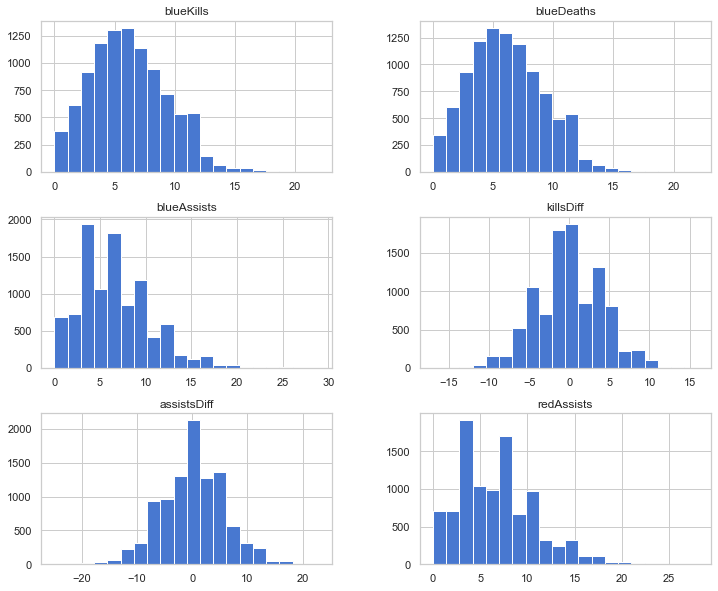

In [20]:
x['killsDiff'] = x['blueKills'] - x['blueDeaths']
x['assistsDiff'] = x['blueAssists'] - x['redAssists']

x[['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists']].hist(figsize=(12,10), bins=20)
plt.show()

/Users/liruizhi/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/liruizhi/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/liruizhi/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/liruizhi/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/liruizhi/opt/anaconda3/lib/python3.8/site

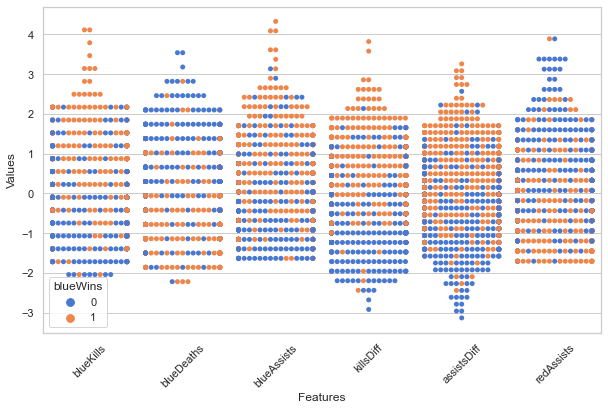

In [22]:
data = x[['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists']].sample(1000)
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

plt.figure(figsize=(10,6))
sns.swarmplot(x='Features', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()

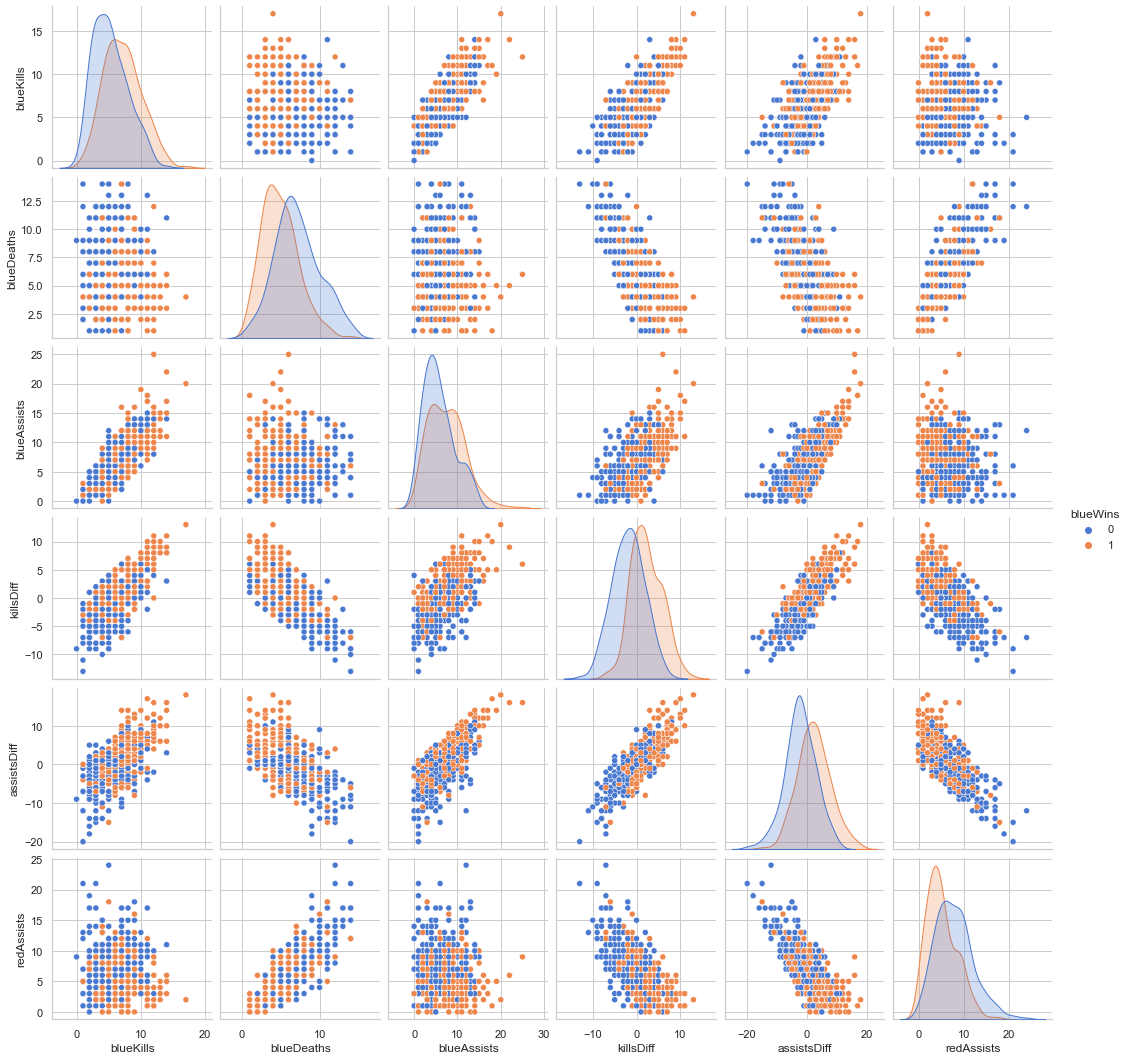

In [23]:
data = pd.concat([y, x], axis=1).sample(500)

sns.pairplot(data, vars=['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists'], 
             hue='blueWins')

plt.show()

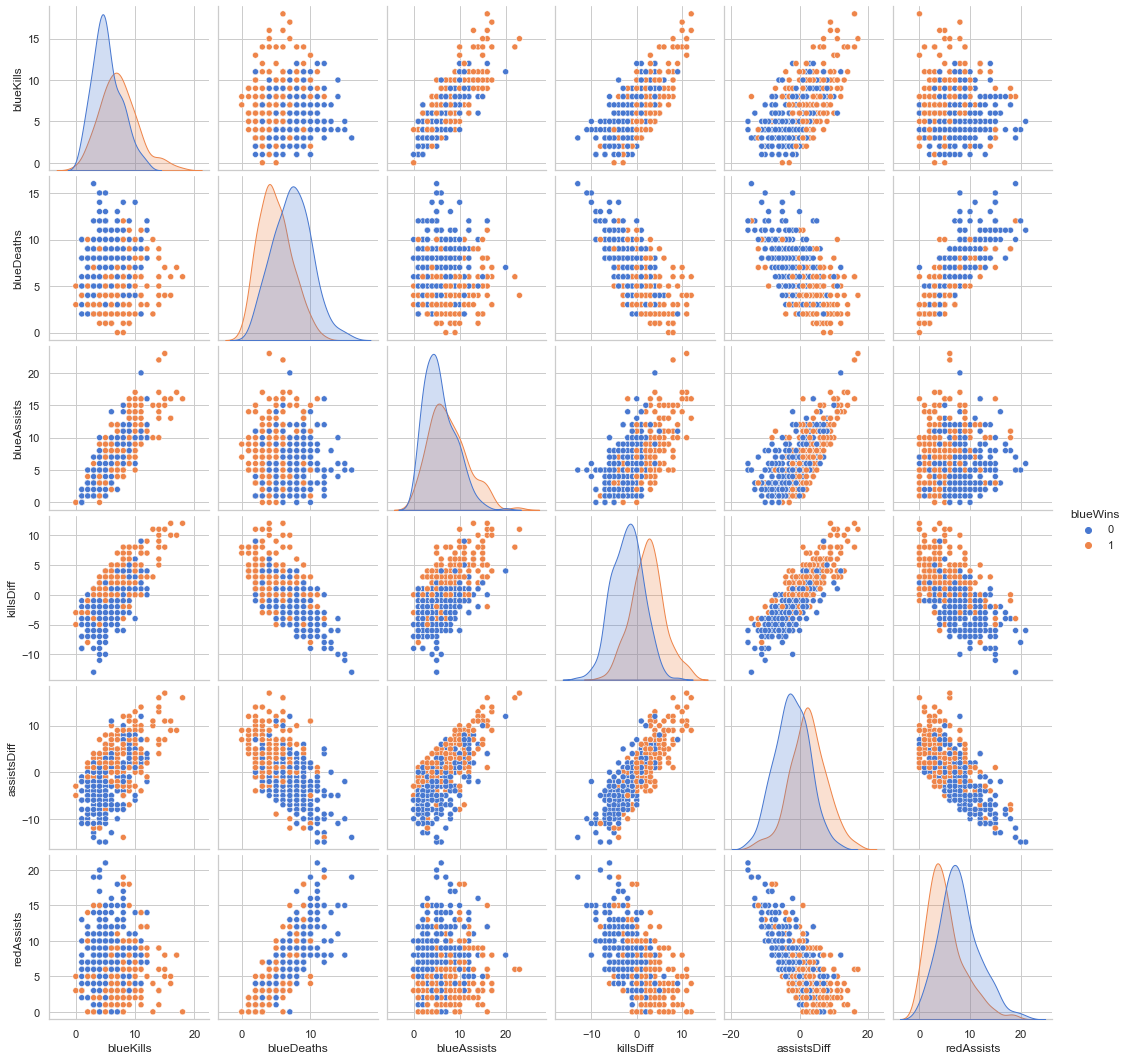

In [24]:
data = pd.concat([y, x], axis=1).sample(500)

sns.pairplot(data, vars=['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists'], 
             hue='blueWins')

plt.show()

eliteDiff
-2    0.286301
-1    0.368772
 0    0.500683
 1    0.632093
 2    0.735211
Name: blueWins, dtype: float64
dragonsDiff
-1    0.374173
 0    0.500000
 1    0.640940
Name: blueWins, dtype: float64
heraldsDiff
-1    0.387729
 0    0.498680
 1    0.595046
Name: blueWins, dtype: float64


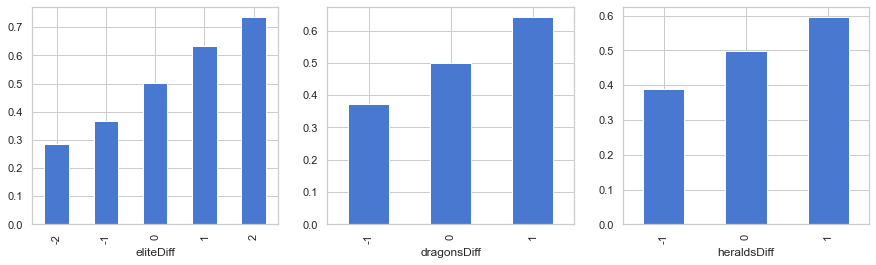

In [25]:
x['dragonsDiff'] = x['blueDragons'] - x['redDragons']
x['heraldsDiff'] = x['blueHeralds'] - x['redHeralds']
x['eliteDiff'] = x['blueEliteMonsters'] - x['redEliteMonsters']

data = pd.concat([y, x], axis=1)

eliteGroup = data.groupby(['eliteDiff'])['blueWins'].mean()
dragonGroup = data.groupby(['dragonsDiff'])['blueWins'].mean()
heraldGroup = data.groupby(['heraldsDiff'])['blueWins'].mean()

fig, ax = plt.subplots(1,3, figsize=(15,4))

eliteGroup.plot(kind='bar', ax=ax[0])
dragonGroup.plot(kind='bar', ax=ax[1])
heraldGroup.plot(kind='bar', ax=ax[2])

print(eliteGroup)
print(dragonGroup)
print(heraldGroup)

plt.show()

towerDiff
-2      27
-1     347
 0    9064
 1     406
 2      28
 3       6
 4       1
Name: blueWins, dtype: int64
towerDiff
-2    0.185185
-1    0.216138
 0    0.498124
 1    0.741379
 2    0.964286
 3    1.000000
 4    1.000000
Name: blueWins, dtype: float64


Text(0, 0.5, 'Count')

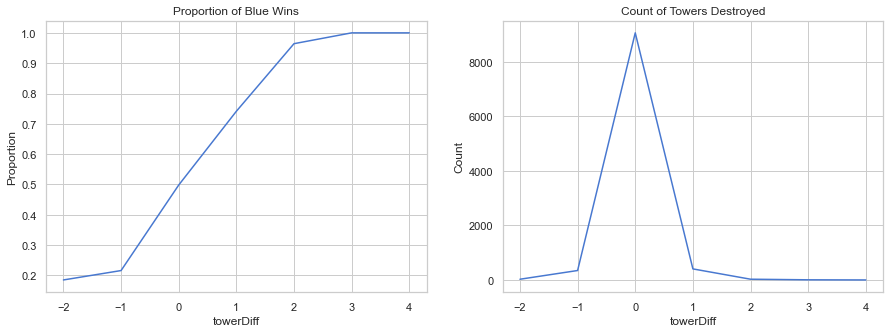

In [26]:
x['towerDiff'] = x['blueTowersDestroyed'] - x['redTowersDestroyed']

data = pd.concat([y, x], axis=1)

towerGroup = data.groupby(['towerDiff'])['blueWins']
print(towerGroup.count())
print(towerGroup.mean())

fig, ax = plt.subplots(1,2,figsize=(15,5))

towerGroup.mean().plot(kind='line', ax=ax[0])
ax[0].set_title('Proportion of Blue Wins')
ax[0].set_ylabel('Proportion')

towerGroup.count().plot(kind='line', ax=ax[1])
ax[1].set_title('Count of Towers Destroyed')
ax[1].set_ylabel('Count')

In [27]:
## 为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split

## 选择其类别为0和1的样本 （不包括类别为2的样本）
data_target_part = y
data_features_part = x

## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(data_features_part, data_target_part, test_size = 0.2, random_state = 2020)

In [28]:
## 导入LightGBM模型
from lightgbm.sklearn import LGBMClassifier
## 定义 LightGBM 模型 
clf = LGBMClassifier()
# 在训练集上训练LightGBM模型
clf.fit(x_train, y_train)

LGBMClassifier()

The accuracy of the Logistic Regression is: 0.8447425028470201
The accuracy of the Logistic Regression is: 0.722165991902834
The confusion matrix result:
 [[714 300]
 [249 713]]


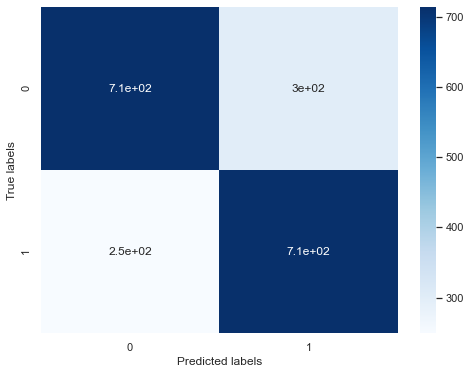

In [29]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

<AxesSubplot:>

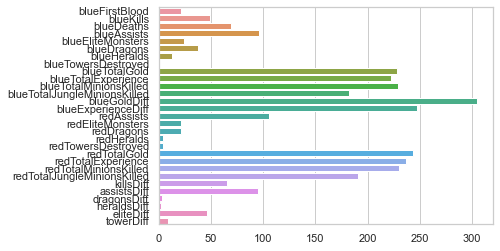

In [30]:
sns.barplot(y=data_features_part.columns, x=clf.feature_importances_)

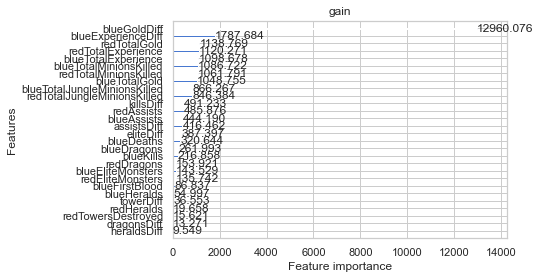

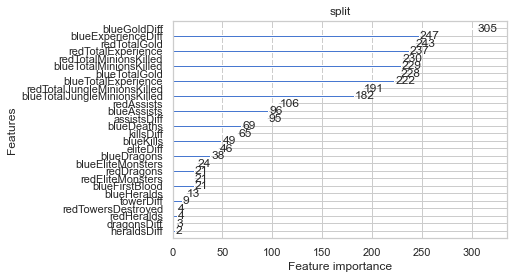

acc= 0.722165991902834


In [31]:
from sklearn.metrics import accuracy_score
from lightgbm import plot_importance

def estimate(model,data):

    #sns.barplot(data.columns,model.feature_importances_)
    ax1=plot_importance(model,importance_type="gain")
    ax1.set_title('gain')
    ax2=plot_importance(model, importance_type="split")
    ax2.set_title('split')
    plt.show()
def classes(data,label,test):
    model=LGBMClassifier()
    model.fit(data,label)
    ans=model.predict(test)
    estimate(model, data)
    return ans
 
ans=classes(x_train,y_train,x_test)
pre=accuracy_score(y_test, ans)
print('acc=',accuracy_score(y_test,ans))

In [32]:
## 从sklearn库中导入网格调参函数
from sklearn.model_selection import GridSearchCV

## 定义参数取值范围
learning_rate = [0.1, 0.3, 0.6]
feature_fraction = [0.5, 0.8, 1]
num_leaves = [16, 32, 64]
max_depth = [-1,3,5,8]

parameters = { 'learning_rate': learning_rate,
              'feature_fraction':feature_fraction,
              'num_leaves': num_leaves,
              'max_depth': max_depth}
model = LGBMClassifier(n_estimators = 50)

## 进行网格搜索
clf = GridSearchCV(model, parameters, cv=3, scoring='accuracy',verbose=3, n_jobs=-1)
clf = clf.fit(x_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    8.9s


[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1


[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:    9.9s finished


In [33]:
clf.best_params_

{'feature_fraction': 1, 'learning_rate': 0.1, 'max_depth': 3, 'num_leaves': 16}

The accuracy of the Logistic Regression is: 0.7440212577502214
The accuracy of the Logistic Regression is: 0.7317813765182186
The confusion matrix result:
 [[722 289]
 [241 724]]


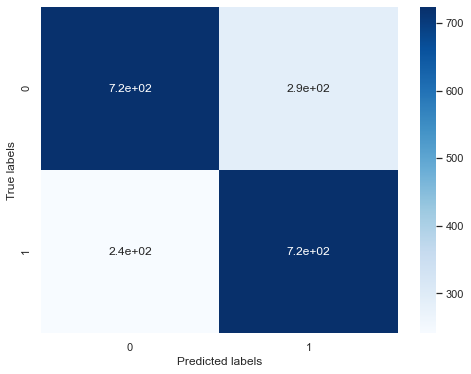

In [35]:
## 在训练集和测试集上分布利用最好的模型参数进行预测

## 定义带参数的 LightGBM模型 
clf = LGBMClassifier(feature_fraction = 0.8,
                    learning_rate = 0.1,
                    max_depth= 3,
                    num_leaves = 16,
                    device='cpu', 
                    gpu_platform_id=0, 
                    gpu_device_id=0)
# 在训练集上训练LightGBM模型
clf.fit(x_train, y_train)

train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()